#  __Netflix__


## Modalités pédagogiques

Pour réaliser ce projet, vous allez utiliser JupyterLab avec des librairies data science en python telles que Pandas, Matplotlib et SeaBorn.
Livrables

## Livrables
Un notebook comportant les analyses pré-exploratoires réalisées (non cleané, pour comprendre votre démarche).
Interpreter vos résultats dans le notebook.

 __Date de rendu projet: Vendredi__ 


## Enonce
Dans ce projet vous allez nettoyer, visualiser et explorer des données Netflix


Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pprint as pp

### __1__

Lecture du fichier :

In [2]:
df = pd.read_csv('Data/netflix_titles.csv', sep=',')

In [3]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

Dimension du dataframe : Combien y a-t-il de films dans ce jeu de données ? Combien y a-t-il de séries ?

In [4]:

df['type'].value_counts()
#df[df['type'] =='Movie'].count()


Movie      6131
TV Show    2676
Name: type, dtype: int64

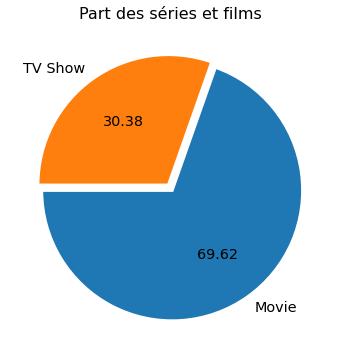

In [5]:
plt.figure(figsize=(12,6))
plt.title("Part des séries et films",fontsize=16)
plt.pie(df['type'].value_counts(),explode=(0.025,0.025), labels=df['type'].value_counts().index,autopct='%.2f', startangle=180 ,textprops={'size': 'x-large','size': 'x-large'},wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.show()

Générer le résumé statistique du dataframe

In [6]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Compter les valeurs manquantes

In [7]:
df.isna().sum() / df.shape[0]

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

### __2__
Exploration des valeurs manquantes :

Sur la colonne des directeurs de production

In [8]:
df['director'].isna().sum()
netflix = df.copy()
netflix['director'].fillna("No Director", inplace=True)


Sur la colonne des acteurs

In [9]:
netflix['cast'].fillna("No Cast", inplace=True)
netflix.shape

(8807, 12)

Suppression des lignes dupliquées (s'ils existents)

In [10]:
df.duplicated().sum()

0

### __4__  
Quel est le film avec la durée la plus longue sur Netflix ?

In [11]:
id_duree= df["duration"].str.split(' ').str[0].dropna().astype("int").idxmax()
df.iloc[id_duree]['title']

'Black Mirror: Bandersnatch'

### __5__  
Etude des catégories avec le plus de contenu

In [12]:
#df.groupby('type')['listed_in'].sum().sort_values(ascending=False).iloc[:3]

# ma colonne categorie
cat = netflix['listed_in']

# ma col ds une liste avec le split ','
y = [sublist.split(', ') for sublist in  cat]

compteur = {}

#recursive pour parcourrir mes listes imbriquees
def count (x,c):
    if isinstance (x, list):
        for lettre in x:
            for l in lettre:
                if l in c:
                    c[l] += 1
                else:
                    c[l] = 1
    else:
        return 0

count(y,compteur)

compteur


{'Documentaries': 869,
 'International TV Shows': 1351,
 'TV Dramas': 763,
 'TV Mysteries': 98,
 'Crime TV Shows': 470,
 'TV Action & Adventure': 168,
 'Docuseries': 395,
 'Reality TV': 255,
 'Romantic TV Shows': 370,
 'TV Comedies': 581,
 'TV Horror': 75,
 'Children & Family Movies': 641,
 'Dramas': 2427,
 'Independent Movies': 756,
 'International Movies': 2752,
 'British TV Shows': 253,
 'Comedies': 1674,
 'Spanish-Language TV Shows': 174,
 'Thrillers': 577,
 'Romantic Movies': 616,
 'Music & Musicals': 375,
 'Horror Movies': 357,
 'Sci-Fi & Fantasy': 243,
 'TV Thrillers': 57,
 "Kids' TV": 451,
 'Action & Adventure': 859,
 'TV Sci-Fi & Fantasy': 84,
 'Classic Movies': 116,
 'Anime Features': 71,
 'Sports Movies': 219,
 'Anime Series': 176,
 'Korean TV Shows': 151,
 'Science & Nature TV': 92,
 'Teen TV Shows': 69,
 'Cult Movies': 71,
 'TV Shows': 16,
 'Faith & Spirituality': 65,
 'LGBTQ Movies': 102,
 'Stand-Up Comedy': 343,
 'Movies': 57,
 'Stand-Up Comedy & Talk Shows': 56,
 'Class

In [13]:
##tri decroissant du dict
sorted_dict = {}
sorted_keys = sorted(compteur, key=compteur.get ,reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = compteur[w]

print(sorted_dict)

{'International Movies': 2752, 'Dramas': 2427, 'Comedies': 1674, 'International TV Shows': 1351, 'Documentaries': 869, 'Action & Adventure': 859, 'TV Dramas': 763, 'Independent Movies': 756, 'Children & Family Movies': 641, 'Romantic Movies': 616, 'TV Comedies': 581, 'Thrillers': 577, 'Crime TV Shows': 470, "Kids' TV": 451, 'Docuseries': 395, 'Music & Musicals': 375, 'Romantic TV Shows': 370, 'Horror Movies': 357, 'Stand-Up Comedy': 343, 'Reality TV': 255, 'British TV Shows': 253, 'Sci-Fi & Fantasy': 243, 'Sports Movies': 219, 'Anime Series': 176, 'Spanish-Language TV Shows': 174, 'TV Action & Adventure': 168, 'Korean TV Shows': 151, 'Classic Movies': 116, 'LGBTQ Movies': 102, 'TV Mysteries': 98, 'Science & Nature TV': 92, 'TV Sci-Fi & Fantasy': 84, 'TV Horror': 75, 'Anime Features': 71, 'Cult Movies': 71, 'Teen TV Shows': 69, 'Faith & Spirituality': 65, 'TV Thrillers': 57, 'Movies': 57, 'Stand-Up Comedy & Talk Shows': 56, 'Classic & Cult TV': 28, 'TV Shows': 16}


In [14]:
top5 = {k: sorted_dict[k] for k in list(sorted_dict)[:5]}
top5

{'International Movies': 2752,
 'Dramas': 2427,
 'Comedies': 1674,
 'International TV Shows': 1351,
 'Documentaries': 869}

<BarContainer object of 5 artists>

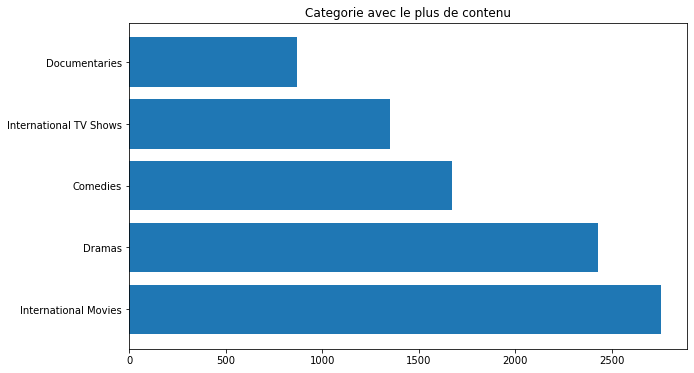

In [15]:
plt.figure(figsize=(10, 6))
plt.title('Categorie avec le plus de contenu')
plt.barh(list(top5.keys()),list(top5.values()),align='center')

In [16]:
cat_df = pd.DataFrame(list(top5.items()))
cat_df.dtypes
cat_df.columns =["Categorie","Count"]
cat_df.head()

Categorie  Count
0    International Movies   2752
1                  Dramas   2427
2                Comedies   1674
3  International TV Shows   1351
4           Documentaries    869

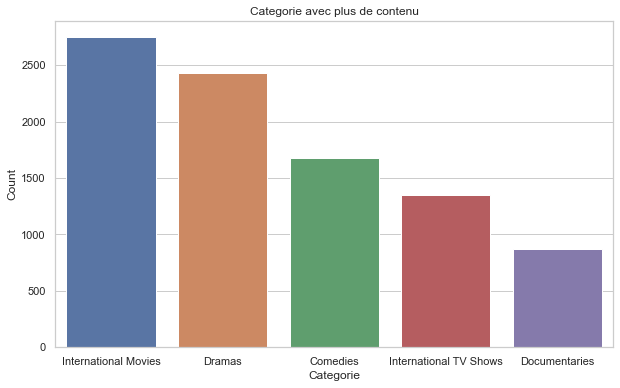

In [17]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax= sns.barplot(x='Categorie', y='Count', data=cat_df).set(title='Categorie avec plus de contenu')
plt.show()

### __6__  
Quels directeurs ont produit le plus de films/séries disponibles sur Netflix ?

In [18]:
# ma colonne categorie
directors = netflix['director']

# ma col ds une liste avec le split ','
y = [sublist.split(', ') for sublist in  directors]

compteur = {}

#recursive pour parcourrir mes listes imbriquees
def count (x,c):
    if isinstance (x, list):
        for lettre in x:
            for l in lettre:
                if l in c:
                    c[l] += 1
                else:
                    c[l] = 1
    else:
        return 0

count(y,compteur)

directors_df = pd.DataFrame(list(compteur.items()))
directors_df.columns =["directors_name","directors_count"]

#On ne retient les no directors pas pertinent  iloc[1:6]
direct_sort = directors_df.sort_values(by="directors_count",ascending=False).iloc[1:6:]
direct_sort

directors_name  directors_count
282   Rajiv Chilaka               22
2692      Jan Suter               21
2691    Raúl Campos               19
618     Suhas Kadav               16
1588   Marcus Raboy               16

<Figure size 576x576 with 0 Axes>

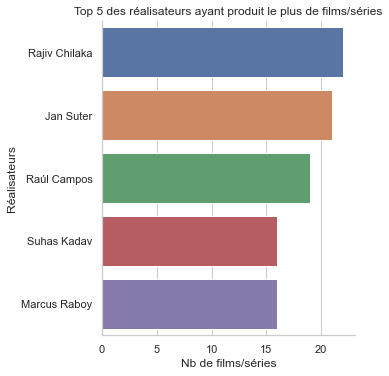

In [19]:
plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid")
ax= sns.catplot(x=direct_sort['directors_count'], y=direct_sort['directors_name'], kind="bar",data=direct_sort)
ax.set(title='Top 5 des réalisateurs ayant produit le plus de films/séries')
ax.set(xlabel='Nb de films/séries', ylabel='Réalisateurs')
plt.show()


### __7__  
Est-ce que Jan Suter travaille souvent avec les mêmes acteurs ?

In [20]:
df['director'].isna().sum()
df_director = df.copy()
df_director[df_director['director'].isin(['Jan Suter'])]

show_id   type                                       title   director  \
5224   s5225  Movie  El Especial de Alex Fernández, el Especial  Jan Suter   

                cast country        date_added  release_year rating duration  \
5224  Alex Fernández  Mexico  October 13, 2017          2017  TV-MA   52 min   

            listed_in                                        description  
5224  Stand-Up Comedy  From a Mexico City theme park, energetic stand...

il a une vingtaine de film a son actif , un acteur peu probable 
En verifiant dans le csv il a collaboré avec plusieurs autres realisateurs et donc d'autre acteurs

In [26]:
df_director.explode('director','cast')


show_id     type                          title             director  \
0         s8    Movie                        Sankofa         Haile Gerima   
1         s9  TV Show  The Great British Baking Show      Andy Devonshire   
2        s10    Movie                   The Starling       Theodore Melfi   
3        s13    Movie                   Je Suis Karl  Christian Schwochow   
4        s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
5327   s8802    Movie                        Zinzana      Majid Al Ansari   
5328   s8803    Movie                         Zodiac        David Fincher   
5329   s8805    Movie                     Zombieland      Ruben Fleischer   
5330   s8806    Movie                           Zoom         Peter Hewitt   
5331   s8807    Movie                         Zubaan          Mozez Singh   

                                                   cast  \
0     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
1     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
2     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
3     Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
4     Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
...                                                 ...   
5327  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
5328  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
5329  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
5330  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
5331  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
0     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
1                                        United Kingdom  September 24, 2021   
2                                         United States  September 24, 2021   
3                               Germany, Czech Republic  September 23, 2021   
4                                                 India  September 21, 2021   
...                                                 ...                 ...   
5327                       United Arab Emirates, Jordan       March 9, 2016   
5328                                      United States   November 20, 2019   
5329                                      United States    November 1, 2019   
5330                                      United States    January 11, 2020   
5331                                              India       March 2, 2019   

      release_year rating   duration  \
0             1993  TV-MA    125 min   
1             2021  TV-14  9 Seasons   
2             2021  PG-13    104 min   
3             2021  TV-MA    127 min   
4             1998  TV-14    166 min   
...            ...    ...        ...   
5327          2015  TV-MA     96 min   
5328          2007      R    158 min   
5329          2009      R     88 min   
5330          2006     PG     88 min   
5331          2015  TV-14    111 min   

                                             listed_in  \
0     Dramas, Independent Movies, International Movies   
1                         British TV Shows, Reality TV   
2                                     Comedies, Dramas   
3                         Dramas, International Movies   
4      Comedies, International Movies, Romantic Movies   
...                                                ...   
5327           Dramas, International Movies, Thrillers   
5328                    Cult Movies, Dramas, Thrillers   
5329                           Comedies, Horror Movies   
5330                Children & Family Movies, Comedies   
5331    Dramas, International Movies, Music & Musicals   

                                            description  
0     On a photo shoot in Ghana, an American model s...  
1     A talented batch of amateur bakers face off in...  
2     A woman adjusting to life after a loss contend...  
3     After 

### __8__  
Représenter les 10 pays qui ont produits le plus de contenus disponibles sur Netflix, avec le nombre de contenus par pays

In [ ]:
netflix['country'].isna().sum()
country_net = netflix.copy()
country_net.dropna(inplace=True)
country_net.shape

In [ ]:
# ma colonne categorie
countries = country_net['country']

# ma col ds une liste avec le split ','
y = [sublist.split(', ') for sublist in  countries]

compteur = {}

#recursive pour parcourrir mes listes imbriquees
def count (x,c):
    if isinstance (x, list):
        for lettre in x:
            for l in lettre:
                if l in c:
                    c[l] += 1
                else:
                    c[l] = 1
    else:
        return 0

count(y,compteur)

country_df = pd.DataFrame(list(compteur.items()))
country_df.columns =["countries","count"]

country_sort = country_df.sort_values(by="count",ascending=False)
country_sort.head()

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = [16 ,8]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

#Top 10 des pays produisant du contenu sans prise en compte ses collaborations
sns.barplot(x=country_sort['count'][:10], y=country_sort['countries'][:10] ,ax=axes[0]).set(title='Top 10 countries without collaboration')

#Top 10 des pays produisant du contenu avec prise en compte ses collaborations
country =  netflix['country'].value_counts().iloc[:10]
sns.barplot(x=country, y=country.index,ax=axes[1]).set(title='Top 10 countries with collaboration')
plt.show

>   Comparaison des classements entre pays produisant seul exclusivement leur contenu à celui incluant la collaboration possible .  
>   On remarque que le classement diffère légèrement avec l'entrée du Canada et de la France dans le top 5 sans collab .    
>   Mais que le trio de tête reste inchangé hormis le volume de production pour les US bien supérieur avec la collaboration


### __9__  
Tracer un graphe à barres du nombre de films/séries par classement de contenu (rating)

In [ ]:
netflix['rating'].isna().sum()

In [ ]:
rate = netflix.copy()

rate['rating'].isna().sum()
rate.dropna(inplace=True)

In [ ]:

rate.groupby('type')["rating"].value_counts(ascending=False)

sns.set_theme(style="ticks")
sns.displot(rate, x=rate['rating'] , hue=rate['type'] ,bins=40,height=6, aspect=15/8 )


### __10__  
Tracer un graphique qui montre l'évolution du nombre de films/séries produits par les 10 pays les plus producteurs de contenus sur Netflix, au fil des ans

In [ ]:
netflix['country'].isna().sum()
netflix['country'].dropna(inplace=True)
type_data = netflix[['release_year','country']]

#type_data['US'] = 
#sns.lineplot(data=type_data , x=type_data['release_year'],y=type_data['country'].value_counts().sort_values(ascending=False) )
#type_data


In [ ]:
netflix_country_year = netflix.groupby(by=['country','type','release_year']).count().reset_index()
netflix_country_year = netflix_country_year[['country','type','release_year']]

la = country_net['country'].values.tolist()

for rows in la:
    if np.where(rows  == netflix_country_year['country'] ):
        netflix_country_year[rows] = netflix_country_year.groupby('release_year')['country'].value_counts().reset_index(drop=True)

netflix_country_year.dropna(inplace=True)


In [ ]:
ax = sns.lineplot(data=netflix_country_year , x=netflix_country_year['release_year'] ,y= netflix_country_year['type'] )
""" ax1 = sns.lineplot(data=netflix_country_year , x=netflix_country_year['release_year'] ,y= netflix_country_year['type'] ) """

In [ ]:

type_data = netflix[['type','release_year']]
TV_show = type_data[type_data['type'] =='TV Show'].groupby('release_year')['type'].count()
Movie = type_data[type_data['type'] =='Movie'].groupby('release_year')['type'].count()

fig, ax = plt.subplots(figsize=(16,8),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=21, nrows=21, figure=fig)
ax1 = fig.add_subplot(facecolor="#363336")

ax1.scatter(x= list(dict(TV_show).keys())[-3],y=list(dict(TV_show).values())[-3],s=300, color='#F5E9F5')
ax1.scatter(x= list(dict(Movie).keys())[-3],y=list(dict(Movie).values())[-3],s=300, color='red')
sns.lineplot(x= list(dict(TV_show).keys())[:-2],y=list(dict(TV_show).values())[:-2],lw=3, color='#F5E9F5',ax=ax1)
sns.lineplot(x= list(dict(Movie).keys())[:-2],y=list(dict(Movie).values())[:-2],lw=3, color='red',ax=ax1)
ax1.text(s="Movie", x=2013.5, y= 600,color='red', va="center",ha="left",fontsize=20)
ax1.text(s="TV show", x=2015.5, y= 400,color='#F5E9F5', va="center",ha="left",fontsize=20)
ax1.set_xticks(list(range(2000,2022,2)))
ax1.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax1.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.set_xlabel("Year")
ax1.set_ylabel("type")
ax1.set_xlim(2000,2020)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(True, alpha=0.4)
ax1.text(s="Movie & TV Show, à travers les années", x= 2000.5,y=700, color='#F5E9F5',fontsize=30)

plt.show()

### __11__  
Distribution de la durée des films disponibles sur Netflix

In [ ]:
Movie = netflix[netflix['type'] =='Movie'].groupby('release_year')['type'].value_counts().sort_values(ascending=False).iloc[:10]

fig = plt.figure(figsize=(10,6))
sns.histplot(data=Movie, color="#E50914")
plt.show() 


### __12__  
Tracer un graphique représentant le nombre de séries par modalité de nombre de saisons

In [ ]:
type_data = netflix[['type','release_year']]
TV_show = type_data[type_data['type'] =='TV Show'].groupby('release_year')['type'].count()
Movie = type_data[type_data['type'] =='Movie'].groupby('release_year')['type'].count()

fig, ax = plt.subplots(figsize=(12,8),facecolor="white")
ax.patch.set_facecolor('white')

spec = gridspec.GridSpec(ncols=21, nrows=21, figure=fig)

ax = fig.add_subplot(facecolor="white")


TV_seasons = netflix[netflix['type'] =='TV Show']['duration'].apply(lambda x : x.split(" ")[0])
TV_seasons = pd.to_numeric(TV_seasons)
TV_seasons = pd.DataFrame(TV_seasons.value_counts())
ax.bar(x = TV_seasons.index, height = TV_seasons.duration,width=0.9,color ='red',alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("TV Show's Seasons", color='white', fontsize=30)
ax.tick_params(axis='x', colors='white',labelsize=20)
ax.set_ylabel("")
ax.set_ylabel("")
ax.grid(True, alpha=0.4,axis='y')
ax.tick_params(axis='y', colors='white',labelsize=15)

ax.set_xticks([])
ax.set_yticks([])

plt.show()

